# Compare the Neighborhoods of New York and Toronto using Clustering

# 1. Introduction/Business Problem

# 1.1 Problem Description

New York and Toronto, both cities are very diverse and are financial capitals of their respective countries. The problem description is how could we determine the similarity or disimilarity of both cities by comparing their neighborhoods. Is New York City more like Toronto or Paris or some other multicultural city?


# 1.2 Background Information

# 1.3 Interest
This information can be used for visitors to get restaurants based on the neighborhoods.

# 2. Description of the Data 

We have used different sources of data to address this problem. Wikipedia is one of the source of data to get list of Postal Codes of Canada[2] and New York City[3]. The data is unstructured and needs to be scrapped and cleaned to make it structured and ready for data analysis.

- We can get geographical coordinates of neighborhoods[4] for getting latitude and longitude data for neighborhoods.

- Another source of data is Foursquare Database. We will use Foursquare API[4] to get all venues. The data we will get is in .json format and we can then filter out all category venues from the json.  

# Instructions

    In Module 3, we explored New York City and the city of Toronto and segmented and clustered their neighborhoods. Both cities are very diverse and are the financial capitals of their respective countries. One interesting idea would be to compare the neighborhoods of the two cities and determine how similar or dissimilar they are. Is New York City more like Toronto or Paris or some other multicultural city? I will leave it to you to refine this idea.
    In a city of your choice, if someone is looking to open a restaurant, where would you recommend that they open it? Similarly, if a contractor is trying to start their own business, where would you recommend that they setup their office?

These are just a couple of many ideas and problems that can be solved using location data in addition to other datasets. No matter what you decide to do, make sure to provide sufficient justification of why you think what you want to do or solve is important and why would a client or a group of people be interested in your project.
Review criteria

This capstone project will be graded by your peers. This capstone project is worth 70% of your total grade. The project will be completed over the course of 2 weeks. Week 1 submissions will be worth 30% whereas week 2 submissions will be worth 40% of your total grade.

For this week, you will required to submit the following:

    A description of the problem and a discussion of the background. (15 marks)
    A description of the data and how it will be used to solve the problem. (15 marks)

For the second week, the final deliverables of the project will be:

    A link to your Notebook on your Github repository, showing your code. (15 marks)
    A full report consisting of all of the following components (15 marks):

    Introduction where you discuss the business problem and who would be interested in this project.
    Data where you describe the data that will be used to solve the problem and the source of the data.
    Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
    Results section where you discuss the results.
    Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
    Conclusion section where you conclude the report.

3. Your choice of a presentation or blogpost. (10 marks)

# 3. Methodology

## 3.1 Data Preparation
Data preparation is one of the first methodology that is the process of collecting data from different sources of data.

### 3.1.1 Data Scrapping
Data scrapping is the process of extracting data from web sources. My first step in this project, scrapping the data from wikipedia[3] page table and transform the table in to pandas dataframe. I have used Pandas to transform the data from wikipedia page table in to dataframe which contains name, Area, population of Addis Ababa city. We get started as follow:

Imporitng all libraries which are important for this project as follow:

In [1]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#!pip install folium # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
# To Install geocoder and geopy uncomment the following
# !pip install geocoder
#!pip install geopy
import geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import seaborn as sns
from matplotlib import pyplot as plt
print('Libraries imported.')

Libraries imported.


In [2]:
# Scrape and read the toronto data from wiki
toronto_df = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")[0]
# Load and read coordinates of toronto neighborhoods
to_coordinates = pd.read_csv("http://cocl.us/Geospatial_data")

In [3]:
# Explore the toronto data
toronto_df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


# Clean the toronto data

As we can see the above dataframe, it consists of three columns: <code>PostalCode, Borough, and Neighborhood</code>

The column <code>Borough</code> consists of <code>Not assigned</code> value. We will ignore cells with a borough that is Not assigned.

In [4]:
toronto_df = toronto_df[toronto_df['Borough'] != 'Not assigned'].reset_index(drop=True)
# Sort by Postal Code in Assending order

toronto_df.head()

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [5]:
# Check if a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
toronto_df[toronto_df['Neighbourhood'].apply(lambda x: x=='Not assigned')]

,Postal Code,Borough,Neighbourhood


In [6]:
# Check and remove duplicates in the column postal code and combine the Neighbourhood if any
toronto_df[toronto_df.duplicated('Postal Code')]

,Postal Code,Borough,Neighbourhood


Explore and clean toronto neighborhood data which contains latitude and longitude of each neighborhood. Finally, merge with the toronto data if the postal code matches. 

In [7]:
to_coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [8]:
# Shape of the dataset
print(toronto_df.shape, to_coordinates.shape)

(103, 3) (103, 3)


In [9]:
# Merge the two dataset together
# Sort both data set
toronto_df = toronto_df.sort_values(by='Postal Code', ascending=True)
to_coordinates = to_coordinates.sort_values(by='Postal Code', ascending=True)
to_df = toronto_df.merge(to_coordinates, on='Postal Code', sort=False, left_index=False,right_index=False )
to_df.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


Make sure that the data has 10 boroughs and 103 neighborhoods

In [10]:
# Check the shape of the dataset
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(to_df['Borough'].unique()),
        to_df.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


# 1. Download and Explore New York Dataset
New York City has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.


For your convenience, I downloaded the files and placed it on the server, so you can simply run a wget command and access the data. So let's go ahead and do that.

In [11]:
# download New York data in json format
#!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset #uncomment to dowload
# Load the json data into dictionary
with open('newyork_data.json') as json_data:
    newyork = json.load(json_data)
neighborhoods_data = newyork['features']
# Define the dataframe columns
col_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']
ny_df = pd.DataFrame(columns=col_names)

Loops through the data and fill the dataframe one row at a time

In [12]:
# To check the structure of the data, uncomment the following line and run
# neighborhoods_data[0]

In [13]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    ny_df = ny_df.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
ny_df.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


And make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [14]:
# Check the shape of the dataset
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(ny_df['Borough'].unique()),
        ny_df.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


Use geopy library to get the latitude and longitude values of both New York and Toronto City.

In order to define an instance of the geocoder, we need to define a user_agent for both cities. We will name our agent ny_explorer, ca_explorer respectively as shown below.


In [15]:
# New York
address_ny = 'New York City, NY'
geolocator_ny = Nominatim(user_agent="ny_explorer")
location_ny = geolocator_ny.geocode(address_ny)
latitude_ny = location_ny.latitude
longitude_ny = location_ny.longitude

# Toronto
address_ca = 'Toronto, CA'
geolocator_ca = Nominatim(user_agent="ca_explorer")
location_ca = geolocator_ca.geocode(address_ca)
latitude_ca = location_ca.latitude
longitude_ca = location_ca.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude_ny, longitude_ny))
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude_ca, longitude_ca))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.
The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.


However, for illustration purposes, let's simplify the above map and segment and cluster the neighborhoods of both New York and Toronto Cities.

Explore and cluster the neighborhoods of each city. We can decide to work with boroughs of the city as follow:

Create a map of Toronto with neighborhoods superimposed on top.

In [16]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude_ca, longitude_ca], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(to_df['Latitude'], to_df['Longitude'], to_df['Borough'], to_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [17]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude_ny, longitude_ny], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(ny_df['Latitude'], ny_df['Longitude'], ny_df['Borough'], ny_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

N.B: You need to register to Forsquare API Developer account to get your creditials. If you are new to forsquare api developer, you can register here <a href='https://foursquare.com/developers/signup'> Create Developer Account</a>. Don't share your creditials to the public.

#### Define Foursquare Credentials and Version

In [28]:
CLIENT_ID = '3KKREKHCYK2ZKBOWNXK1FAEHLPQKK3I5MS0QADV2TSM0CUUA' # your Foursquare ID
CLIENT_SECRET = '5K3MGAP23DHNKYJJ5LCQCEKRMUUM1SXF43OHCJ0VJT2R3Y5R' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3KKREKHCYK2ZKBOWNXK1FAEHLPQKK3I5MS0QADV2TSM0CUUA
CLIENT_SECRET:5K3MGAP23DHNKYJJ5LCQCEKRMUUM1SXF43OHCJ0VJT2R3Y5R


#### Now, let's get the top 100 venues within a radius of 500 meters.

#### Let's create a function to repeat the same process to all the neighborhoods.

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [83]:
toronto_venues = getNearbyVenues(names=to_df['Neighbourhood'], 
                               latitudes=to_df['Latitude'], 
                               longitudes=to_df['Longitude'])


Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale, Willowdale East
York Mills West
Willowdale, Willowdale West
Parkwoods
Don Mills
Don Mills
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview
Downsview
Downsview
Downsview
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto, Broadview North (Old East York)
The Danforth West, 

In [33]:
ny_venues = getNearbyVenues(names=ny_df['Neighborhood'], 
                               latitudes=ny_df['Latitude'], 
                               longitudes=ny_df['Longitude'])

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [84]:
print("The size:", toronto_venues.shape)
toronto_venues.head()

The size: (2122, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Malvern, Rouge",43.806686,-79.194353,Interprovincial Group,43.805630,-79.200378,Print Shop
2,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Chris Effects Painting,43.784343,-79.163742,Construction & Landscaping
3,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank


In [85]:
print("The shape:", ny_venues.shape)
ny_venues.head()

The shape: (10098, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


#### Let's find out how many unique categories can be curated from all the returned venues


In [86]:
print("There are {} uniques categories were returned of Toronto.".format(len(toronto_venues['Venue Category'].unique())))
print("There are {} uniques categories were returned of New York.".format(len(ny_venues['Venue Category'].unique())))

There are 267 uniques categories were returned of Toronto.
There are 427 uniques categories were returned of New York.


## Now we will Analyze Each Neighborhood
In this analysis we use one-hot encoding method to convert categorical values to numerical. Becuase, we can't be able to anaylze categorical variables.

In [87]:
# one hot encoding Toronto data
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [88]:
# one hot encoding New York data
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['Neighborhood'] = ny_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]

ny_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Basketball Court,College Bookstore,College Cafeteria,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Nightlife Spot,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Org

In [89]:
# Let's examine the new data shape
print(ny_onehot.shape, toronto_onehot.shape)

(10098, 427) (2122, 267)


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [90]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.0,0

In [91]:
ny_grouped = ny_onehot.groupby('Neighborhood').mean().reset_index()
ny_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Basketball Court,College Bookstore,College Cafeteria,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Nightlife Spot,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Org

In [92]:
print(toronto_grouped.shape,ny_grouped.shape)

(96, 267) (301, 427)


First, let's write a function to sort the venues in descending order.


In [93]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [94]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Skating Rink,Breakfast Spot,Latin American Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Escape Room,Doner Restaurant
1,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Skating Rink,Gym,Pharmacy,Pub,Sandwich Place,Women's Store,Dim Sum Restaurant,Deli / Bodega
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Grocery Store,Shopping Mall,Sandwich Place,Bridal Shop,Restaurant,Pizza Place,Pharmacy,Mobile Phone Shop
3,Bayview Village,Café,Japanese Restaurant,Bank,Chinese Restaurant,Women's Store,Department Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
4,"Bedford Park, Lawrence Manor East",Italian Restaurant,Coffee Shop,Sandwich Place,Grocery Store,Cosmetics Shop,Liquor Store,Juice Bar,Indian Restaurant,Restaurant,Butcher


### Repeat the same process for New York

In [95]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ny_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
ny_neighborhoods_venues_sorted['Neighborhood'] = ny_grouped['Neighborhood']

for ind in np.arange(ny_grouped.shape[0]):
    ny_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], num_top_venues)

ny_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Supermarket,Deli / Bodega,Intersection,Check Cashing Service,Chinese Restaurant,Martial Arts School,Electronics Store,Fast Food Restaurant,Gas Station
1,Annadale,Bakery,Food,Park,Liquor Store,Train Station,Diner,Restaurant,Pizza Place,American Restaurant,Dance Studio
2,Arden Heights,Pizza Place,Pharmacy,Coffee Shop,Bus Stop,Women's Store,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Factory
3,Arlington,Intersection,Deli / Bodega,American Restaurant,Bus Stop,Women's Store,Fish & Chips Shop,Event Space,Exhibit,Eye Doctor,Factory
4,Arrochar,Bus Stop,Italian Restaurant,Deli / Bodega,Bagel Shop,Food Truck,Supermarket,Middle Eastern Restaurant,Outdoors & Recreation,Sandwich Place,Athletics & Sports


In [96]:
print(ny_neighborhoods_venues_sorted.shape, neighborhoods_venues_sorted.shape)

(301, 11) (96, 11)


# Data Analysis

#### Let's see the most common venue categories of both city

In [97]:
top_toronto_venue = toronto_venues['Venue Category'].value_counts(normalize=False).to_frame(name='Number of Venues')
top_toronto_venue = top_toronto_venue.reset_index().head(10)
top_toronto_venue = top_toronto_venue.rename(columns={'index':'Venue Category'})
top_toronto_venue

,Venue Category,Number of Venues
0,Coffee Shop,178
1,Café,94
2,Restaurant,63
3,Park,52
4,Pizza Place,48
5,Italian Restaurant,47
6,Japanese Restaurant,42
7,Hotel,41
8,Sandwich Place,41
9,Bakery,40


In [98]:
top_newyork_venue = ny_venues['Venue Category'].value_counts(normalize=False).to_frame(name='Number of Venues')
top_newyork_venue = top_newyork_venue.reset_index().head(10)
top_newyork_venue = top_newyork_venue.rename(columns={'index':'Venue Category'})
top_newyork_venue

,Venue Category,Number of Venues
0,Pizza Place,435
1,Coffee Shop,308
2,Italian Restaurant,306
3,Deli / Bodega,282
4,Bakery,235
5,Bar,222
6,Chinese Restaurant,222
7,Grocery Store,188
8,Sandwich Place,180
9,Café,173


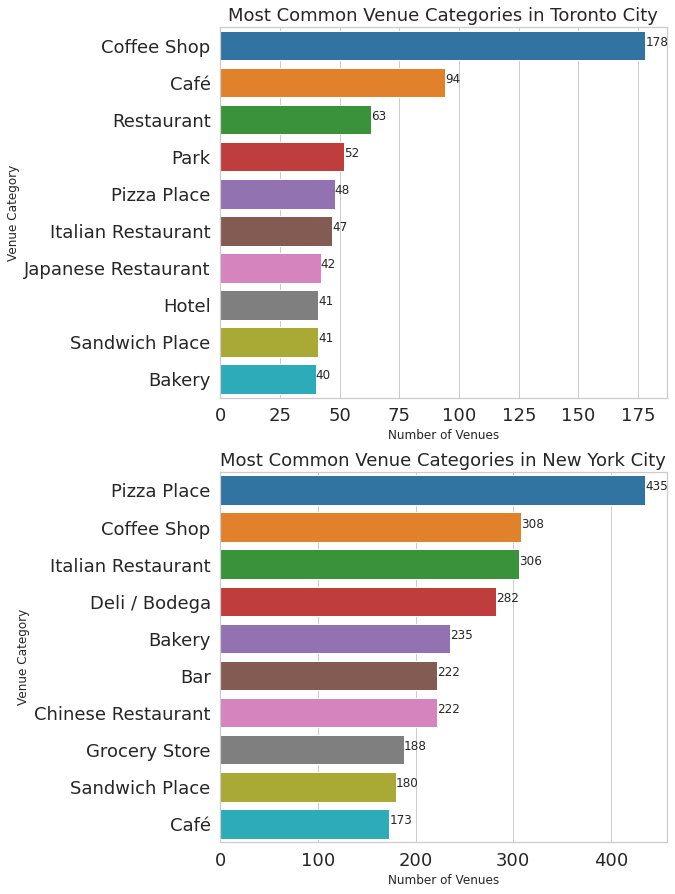

In [99]:
fig, ax = plt.subplots(2, 1, figsize=(8, 15))
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.barplot(ax=ax[0], data = top_toronto_venue, y='Venue Category', x='Number of Venues');
ax[0].set_title("Most Common Venue Categories in Toronto City", fontsize=18)
ax[0].tick_params(labelsize=18)
sns.barplot(ax=ax[1], data = top_newyork_venue, y='Venue Category', x='Number of Venues');
ax[1].set_title("Most Common Venue Categories in New York City", fontsize=18)
ax[1].tick_params(labelsize=18)
for i in range(2):
    for p in ax[i].patches:
        count ='{:,.0f}'.format(p.get_width())
        width, height =p.get_width(),p.get_height()
        x=p.get_x()+width+0.02
        y=p.get_y()+height/2
        ax[i].annotate(count,(x,y))

### Top 10 Most Common Vanue Categories that exist in more Neighborhoods in both Cities

In [100]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').max().reset_index()
top_toronto_neighborhoods = toronto_grouped.drop('Neighborhood', axis=1).sum().sort_values(ascending=False)
top_toronto_neighborhoods = top_toronto_neighborhoods.head(10).to_frame(name='Number of Neighborhoods').reset_index()
top_toronto_neighborhoods = top_toronto_neighborhoods.rename(columns={'index':'Venue Category'})
top_toronto_neighborhoods

,Venue Category,Number of Neighborhoods
0,Coffee Shop,45
1,Park,41
2,Café,35
3,Restaurant,35
4,Pizza Place,34
5,Sandwich Place,31
6,Bakery,27
7,Italian Restaurant,27
8,Bank,23
9,Japanese Restaurant,22


In [101]:
newyork_grouped = ny_onehot.groupby('Neighborhood').max().reset_index()
top_newyork_neighborhoods = newyork_grouped.drop('Neighborhood', axis=1).sum().sort_values(ascending=False)
top_newyork_neighborhoods = top_newyork_neighborhoods.head(10).to_frame(name='Number of Neighborhoods').reset_index()
top_newyork_neighborhoods = top_newyork_neighborhoods.rename(columns={'index':'Venue Category'})
top_newyork_neighborhoods

,Venue Category,Number of Neighborhoods
0,Pizza Place,200
1,Deli / Bodega,162
2,Chinese Restaurant,135
3,Sandwich Place,127
4,Grocery Store,126
5,Donut Shop,121
6,Pharmacy,121
7,Italian Restaurant,120
8,Bakery,120
9,Coffee Shop,118


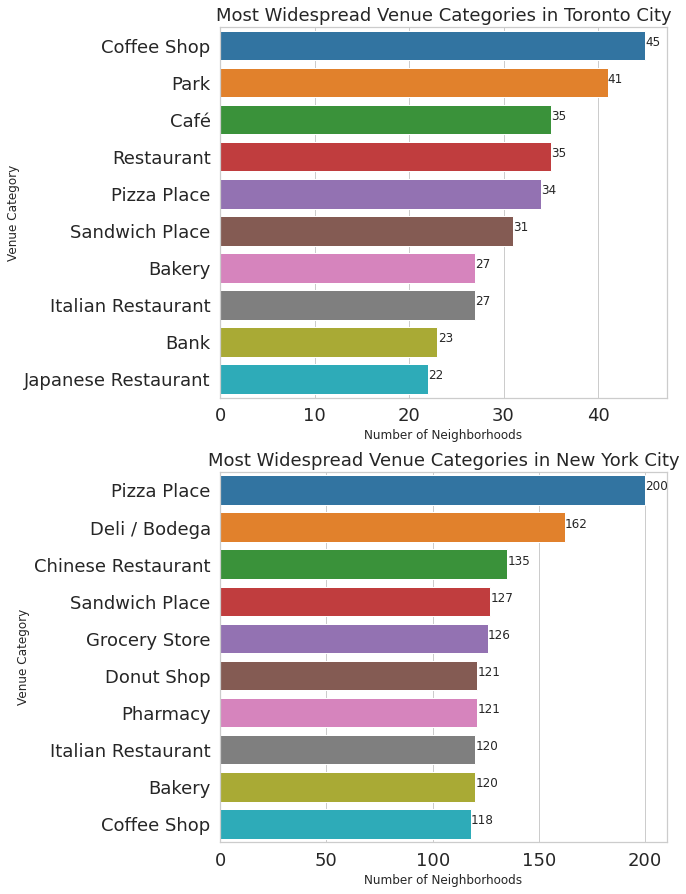

In [102]:
fig, ax = plt.subplots(2, 1, figsize=(8, 15))
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.barplot(ax=ax[0], data = top_toronto_neighborhoods, y='Venue Category', x='Number of Neighborhoods');
ax[0].set_title("Most Widespread Venue Categories in Toronto City", fontsize=18)
ax[0].tick_params(labelsize=18)
sns.barplot(ax=ax[1], data = top_newyork_neighborhoods, y='Venue Category', x='Number of Neighborhoods');
ax[1].set_title("Most Widespread Venue Categories in New York City", fontsize=18)
ax[1].tick_params(labelsize=18)
for i in range(2):
    for p in ax[i].patches:
        count ='{:,.0f}'.format(p.get_width())
        width, height =p.get_width(),p.get_height()
        x=p.get_x()+width+0.02
        y=p.get_y()+height/2
        ax[i].annotate(count,(x,y))

In [103]:
columns_toronto_only = set(toronto_grouped.columns).difference(set(newyork_grouped.columns))
columns_newyork_only = set(newyork_grouped.columns).difference(set(toronto_grouped.columns))

In [119]:
newyork_grouped_ = newyork_grouped.copy()
newyork_grouped_['Neighborhood'] = newyork_grouped_['Neighborhood'].apply(lambda x: x + '_NYC')
toronto_grouped_ = toronto_grouped.copy()
toronto_grouped_['Neighborhood'] = toronto_grouped_['Neighborhood'].apply(lambda x: x + '_Toronto')

In [120]:
for col in columns_toronto_only:
    newyork_grouped_[col] = 0
for col in columns_newyork_only:
    toronto_grouped_[col] = 0
    
all_cols_sorted = ['Neighborhood'] + sorted(list(newyork_grouped_.drop('Neighborhood', axis=1).columns), key=str.lower)
newyork_grouped_ = newyork_grouped_[all_cols_sorted]
toronto_grouped_ = toronto_grouped_[all_cols_sorted]
    
newyork_toronto_grouped = pd.concat([newyork_grouped_, toronto_grouped_]).reset_index(drop=True)

In [121]:
newyork_toronto_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Auto Workshop,Automotive Shop,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,BBQ Joint,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Auditorium,College Basketball Court,College Bookstore,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Distribution Center,Dive Bar,Doctor's Office,Dog Run,Doner Restaurant,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hakka Restaurant,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,IT Services,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean BBQ Restaurant,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Mode

In [107]:
newyork_toronto_grouped.shape

(397, 459)

In [108]:
# obtaining the most popular categories for each neighborhood
newyork_toronto_neighborhoods_categories_sorted = pd.DataFrame(columns=columns)
newyork_toronto_neighborhoods_categories_sorted['Neighborhood'] = newyork_toronto_grouped['Neighborhood']

for ind in np.arange(newyork_toronto_grouped.shape[0]):
    newyork_toronto_neighborhoods_categories_sorted.iloc[ind, 1:] = return_most_common_venues(
        newyork_toronto_grouped.iloc[ind, :], num_top_venues)

newyork_toronto_neighborhoods_categories_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton_NYC,Cosmetics Shop,Discount Store,Breakfast Spot,Spanish Restaurant,Spa,Supermarket,Fried Chicken Joint,Fast Food Restaurant,Bus Station,Gas Station
1,Annadale_NYC,Bakery,Food,Park,Liquor Store,Diner,Pizza Place,Dance Studio,Train Station,American Restaurant,Restaurant
2,Arden Heights_NYC,Pizza Place,Pharmacy,Coffee Shop,Bus Stop,Yoga Studio,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service
3,Arlington_NYC,Intersection,Bus Stop,Deli / Bodega,American Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant
4,Arrochar_NYC,Cosmetics Shop,Deli / Bodega,Food Truck,Supermarket,Bus Stop,Middle Eastern Restaurant,Mediterranean Restaurant,Outdoors & Recreation,Sandwich Place,Athletics & Sports


## Clustering

In [109]:
# set number of clusters
kclusters = 5

newyork_toronto_grouped_clustering = newyork_toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(newyork_toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 2, 2, 2, 2, 2, 3, 2, 2, 1], dtype=int32)

In [110]:
# add clustering labels
newyork_toronto_neighborhoods_categories_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge newyork_toronto_grouped with toronto_data to add latitude/longitude for each neighbourhood

newyork_toronto_clustering = newyork_toronto_neighborhoods_categories_sorted.set_index('Neighborhood')

newyork_toronto_clustering.head()

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,
Allerton_NYC,1,Cosmetics Shop,Discount Store,Breakfast Spot,Spanish Restaurant,Spa,Supermarket,Fried Chicken Joint,Fast Food Restaurant,Bus Station,Gas Station
Annadale_NYC,2,Bakery,Food,Park,Liquor Store,Diner,Pizza Place,Dance Studio,Train Station,American Restaurant,Restaurant
Arden Heights_NYC,2,Pizza Place,Pharmacy,Coffee Shop,Bus Stop,Yoga Studio,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service
Arlington_NYC,2,Intersection,Bus Stop,Deli / Bodega,American Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant
Arrochar_NYC,2,Cosmetics Shop,Deli / Bodega,Food Truck,Supermarket,Bus Stop,Middle Eastern Restaurant,Mediterranean Restaurant,Outdoors & Recreation,Sandwich Place,Athletics & Sports


In [111]:
# Group the neghborhoods in each cluster
cluster_neighbors = newyork_toronto_clustering.reset_index().groupby('Cluster Labels')['Neighborhood'].count().to_frame(name='Number of Neighborhoods')
cluster_neighbors

,Number of Neighborhoods
Cluster Labels,
0,39
1,118
2,183
3,22
4,35


In [112]:
Cluster_1 = newyork_toronto_clustering.loc[newyork_toronto_clustering['Cluster Labels'] == 0, :]
Cluster_2 = newyork_toronto_clustering.loc[newyork_toronto_clustering['Cluster Labels'] == 1, :]
Cluster_3 = newyork_toronto_clustering.loc[newyork_toronto_clustering['Cluster Labels'] == 2, :]
Cluster_4 = newyork_toronto_clustering.loc[newyork_toronto_clustering['Cluster Labels'] == 3, :]
Cluster_5 = newyork_toronto_clustering.loc[newyork_toronto_clustering['Cluster Labels'] == 4, :]

In [113]:
import nest_asyncio
nest_asyncio.apply()

In [114]:
clust_cats = []
clusters = [Cluster_1, Cluster_2, Cluster_3, Cluster_4, Cluster_5]
for i, clus in enumerate(clusters):
    clust_cats.append([])
    for n in clus.index.values:
        if n.endswith('NYC'):
            nn = n[:-4]
            clust_cats[i].extend(list(ny_venues[ny_venues['Neighborhood'] == nn]['Venue Category'].values))
        else:
            nn = n[:-8]
            clust_cats[i].extend(list(toronto_venues[toronto_venues['Neighborhood'] == nn]['Venue Category'].values))
    clust_cats[i] = pd.Series(clust_cats[i]).value_counts(normalize=True) * 100

In [115]:
n_counts = []
for c in clusters:
    nyc_c = 0
    tor_c = 0
    for n in c.index.values:
        if n.endswith('NYC'):
            nyc_c += 1
        else:
            tor_c += 1
    n_counts.append((nyc_c, tor_c))

In [122]:
n_counts

[(25, 14), (109, 9), (120, 63), (22, 0), (25, 10)]

In [116]:
ind = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
similar_clusters_df = pd.DataFrame({
    'New York': [x[0] for x in n_counts],
    'Toronto': [x[1] for x in n_counts]
}, index = ind)
similar_clusters_df

,New York,Toronto
Cluster 1,25,14
Cluster 2,109,9
Cluster 3,120,63
Cluster 4,22,0
Cluster 5,25,10


In [81]:
clust_cats = []
clusters = [Cluster_1, Cluster_2, Cluster_3, Cluster_4, Cluster_5]
for i, clus in enumerate(clusters):
    clust_cats.append([])
    for n in clus.index.values:
        if n.endswith('NYC'):
            nn = n[:-4]
            clust_cats[i].extend(list(ny_venues[ny_venues['Neighborhood'] == nn]['Venue Category'].values))
        else:
            nn = n[:-8]
            clust_cats[i].extend(list(toronto_venues[toronto_venues['Neighborhood'] == nn]['Venue Category'].values))
    clust_cats[i] = pd.Series(clust_cats[i]).value_counts(normalize=True) * 100


In [82]:
for i in range(kclusters):
    df = pd.DataFrame(data=clust_cats[i], columns=["% of venues"])
    print("Cluster {}".format(i+1))
    display(df.head(7))

Cluster 1


,% of venues
Coffee Shop,5.351522
Café,4.249738
Bar,3.305352
Bakery,2.938090
Pizza Place,2.833158
Italian Restaurant,2.780693
Park,2.203568


Cluster 2


,% of venues
Pizza Place,6.350131
Deli / Bodega,3.903292
Pharmacy,3.466356
Chinese Restaurant,3.378969
Donut Shop,3.349840
Bank,3.291582
Sandwich Place,2.825517


Cluster 3


,% of venues
Pizza Place,4.479419
Park,3.934625
Deli / Bodega,3.510896
Grocery Store,2.300242
Bus Stop,2.239709
Sandwich Place,2.239709
Coffee Shop,2.179177


Cluster 4


,% of venues
Coffee Shop,4.288597
Italian Restaurant,3.834511
Pizza Place,3.229062
Bar,2.976791
Café,2.320888
Bakery,2.320888
American Restaurant,1.866801


Cluster 5


,% of venues
Coffee Shop,6.097937
Italian Restaurant,3.264552
Café,2.740992
Pizza Place,2.248229
Bakery,2.125038
Hotel,2.125038
American Restaurant,2.063443


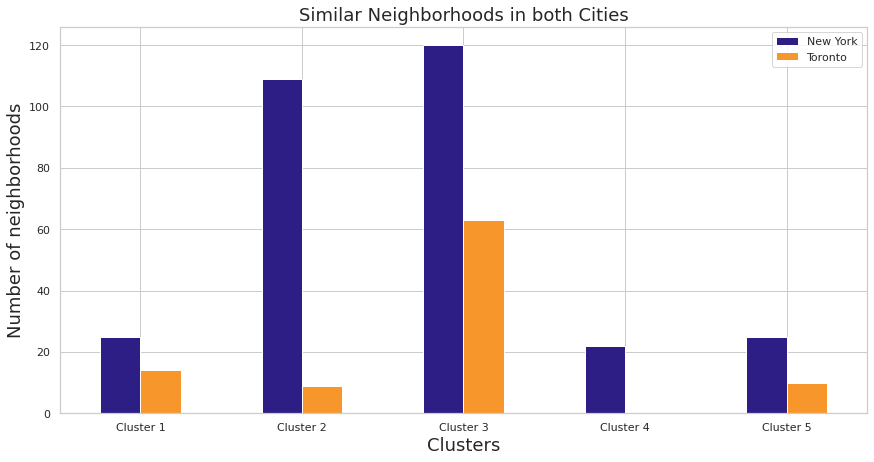

In [117]:
fig, ax = plt.subplots(figsize=(12,6))
similar_clusters_df.plot(kind='bar', color=['#2d1e86', '#f6962b'], rot=0, ax=ax)

# plot_conf(ax, xlbl='', ylbl='Number of neighborhoods', t='')
plt.tight_layout()
plt.title('Similar Neighborhoods in both Cities', fontsize=18)
plt.xlabel("Clusters", fontsize=18)
plt.ylabel("Number of neighborhoods", fontsize=18)
fig.savefig('similar_neighborhoods.png', dpi=300)

1. https://ich.unesco.org/en/RL/ethiopian-epiphany-01491
2. https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
3. https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm
4. http://cocl.us/Geospatial_data
5. https://Foursquare.com
6. https://foursquare.com/developers/signup